<h1 style='color: #00A78C; font-size: 34px; font-weight: bold;'>Exploração CEAPS Senado

</h1>


# <font color="#FFA17A" style="font-size: 30px;">Objetivo</font>
<hr style="border: 2px solid #FFA17A;">

 <p style='font-size: 23px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i><b>Explorar o CEAPS(Cota para Exercício da Atividade Parlamentar dos Senadores), aplicar processos de tratamento e limpeza de dados nele ( Data Wrangling). E buscar deixar os dados prontos para análises mais profundas e conhecer melhor os gastos dos senadores do Brasil.</b></i>     
</p>

---

# <font color="#FFA17A" style="font-size: 30px;">Roteiro</font>
<hr style="border: 2px solid #FFA17A;">

<h1 style='color: black; font-size:22px; font-weight: bold;'> 1. Importação e tratamento dos dados
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'>2. Data Visualization & Storytelling 

</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
3. 
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
4. 
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
5. 
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
6. 
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
7. 
</h1>

---

# <font color="#FFA17A" style="font-size: 30px;">1. Importação e tratamento dos dados </font>
<hr style="border: 2px solid #FFA17A;">

In [1101]:
# IMPORTANMDO BIBLIOTECAS

import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import plotly.graph_objects as go
import matplotlib.patches as mpatches
import plotly.express as px
import locale
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

In [1102]:
# Lista para armazenar os caminhos dos arquivos CSV

caminho_arquivos = [
    os.path.join("Datasets", "despesa_ceaps_2018.xlsx"),
    os.path.join("Datasets", "despesa_ceaps_2019.xlsx"),
    os.path.join("Datasets", "despesa_ceaps_2020.xlsx"),
    os.path.join("Datasets", "despesa_ceaps_2021.xlsx"),
    os.path.join("Datasets", "despesa_ceaps_2022.xlsx")
] 

# Lista para armazenar os DataFrames de cada arquivo
data_frames = []

# Iterar sobre os caminhos dos arquivos CSV
for arquivo in caminho_arquivos:
    df = pd.read_excel(arquivo,skiprows=1)
    data_frames.append(df)

# Concatenar os DataFrames em um único DataFrame
df = pd.concat(data_frames, ignore_index=True)
df

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,2018-01-02 00:00:00,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088462
1,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,2018-01-02 00:00:00,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....",274.99,2088476
2,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,2018-01-02 00:00:00,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...",1094.29,2088528
3,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,2018-01-24 00:00:00,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...",1553.99,2088475
4,2018,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/18,2018-02-01 00:00:00,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088477
...,...,...,...,...,...,...,...,...,...,...,...
93820,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,2022-12-06 00:00:00,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04,2191398
93821,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,2022-12-09 00:00:00,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19,2192272
93822,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,2022-12-20 00:00:00,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.90,2192274
93823,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,2022-12-21 00:00:00,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31,2192244


---
## <font color=#40634D style="font-size: 30px;">Verificando valores nulos e duplicatas</font>

---

In [1103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93825 entries, 0 to 93824
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                93825 non-null  int64  
 1   MES                93825 non-null  int64  
 2   SENADOR            93825 non-null  object 
 3   TIPO_DESPESA       93825 non-null  object 
 4   CNPJ_CPF           93825 non-null  object 
 5   FORNECEDOR         93825 non-null  object 
 6   DOCUMENTO          89846 non-null  object 
 7   DATA               93825 non-null  object 
 8   DETALHAMENTO       57459 non-null  object 
 9   VALOR_REEMBOLSADO  93825 non-null  float64
 10  COD_DOCUMENTO      93825 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 7.9+ MB


In [1104]:
df['DETALHAMENTO'] = df['DETALHAMENTO'].fillna('Não Informado')

In [1105]:
df['DOCUMENTO'] = df['DOCUMENTO'].fillna('Não Informado')

In [1106]:
# Duplicatas

df.duplicated().unique()

array([False])

---
## <font color=#40634D style="font-size: 30px;">Ajustando formatos e eliminando colunas</font>

---

In [1107]:
df

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,Não Informado,2018-01-02 00:00:00,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088462
1,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,2018-01-02 00:00:00,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....",274.99,2088476
2,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,2018-01-02 00:00:00,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...",1094.29,2088528
3,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,2018-01-24 00:00:00,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...",1553.99,2088475
4,2018,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/18,2018-02-01 00:00:00,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088477
...,...,...,...,...,...,...,...,...,...,...,...
93820,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,2022-12-06 00:00:00,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04,2191398
93821,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,2022-12-09 00:00:00,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19,2192272
93822,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,2022-12-20 00:00:00,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.90,2192274
93823,2022,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,2022-12-21 00:00:00,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31,2192244


In [1108]:
display(type(df['CNPJ_CPF'][0]))
display(type(df['VALOR_REEMBOLSADO'][0]))

str

numpy.float64

In [1109]:
df = df.drop(['DOCUMENTO', 'COD_DOCUMENTO'], axis=1)

---
## <font color=#40634D style="font-size: 30px;">Correções colunas datas</font>

---

In [1110]:
lista = [type(i) for i in df['DATA']]
lista = pd.Series(lista)
lista.value_counts()

<class 'datetime.datetime'>                           77038
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    16782
<class 'str'>                                             5
dtype: int64

In [1111]:
timestamps_apenas = lista[lista == pd.Timestamp]
str_apenas = lista[lista == str]
str_apenas.index

Int64Index([13941, 16559, 35478, 56488, 62364], dtype='int64')

In [1112]:
df.loc[35478, 'DATA'] = pd.to_datetime('31/01/2019', format='%d/%m/%Y')
df.loc[56488, 'DATA'] = pd.to_datetime('05/05/2022', format='%d/%m/%Y')
df.loc[62364, 'DATA'] = pd.to_datetime('29/10/2022', format='%d/%m/%Y')
df.loc[13941, 'DATA'] = pd.to_datetime('09/05/2018', format='%d/%m/%Y')
df.loc[16559, 'DATA'] = pd.to_datetime('16/11/2018', format='%d/%m/%Y')

In [1113]:
df['DATA'] = pd.to_datetime(df['DATA'])
df['DIA'] = df['DATA'].dt.day.astype(int)
df = df[['ANO', 'MES', 'DIA', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR',
         'DATA', 'DETALHAMENTO', 'VALOR_REEMBOLSADO']]

df = df.drop(['DATA'], axis=1)

---
## <font color=#40634D style="font-size: 30px;">Ajustar nome das empresas baseado no CNPJ/CPF</font>

---

In [1114]:
df['CNPJ_CPF'].value_counts().head(15)

16.978.175/0001-08    7050
33.937.681/0001-78    2509
07.575.651/0001-59    1858
02.558.157/0001-62    1836
26.480.780/0001-08    1204
17.895.646/0001-87     818
09.296.295/0001-60     783
33.469.172/0022-92     758
00.031.708/0001-00     752
14.294.443/0001-47     573
00.821.459/0001-56     547
02.575.829/0001-48     432
10.835.932/0001-08     418
22.052.777/0001-32     400
00.556.066/0001-62     395
Name: CNPJ_CPF, dtype: int64

In [1115]:
# Agrupar os dados por CNPJ/CPF e obter o fornecedor mais frequente
banco_agrupado = df.groupby('CNPJ_CPF')['FORNECEDOR'].agg(lambda x: x.value_counts().index[0])

# Mapear os valores do dicionário para o DataFrame
df['FORNECEDOR'] = df['CNPJ_CPF'].map(banco_agrupado)


# <font color="#FFA17A" style="font-size: 30px;">2. Data Visualization & Storytelling</font>
<hr style="border: 2px solid #FFA17A;">

1.<font color=#40634D style="font-size: 25px;"> Quais senadores mais fizeram declaração de despesas?</font>
---
2.<font color=#40634D style="font-size: 25px;"> Quais senadores gastaram mais?</font> 
---
3.<font color=#40634D style="font-size: 25px;"> Qual o tipo de despesa mais recorrente?</font>
---
4.<font color=#40634D style="font-size: 25px;"> Em ano de eleições os senadores gastam mais? 2022</font>
---
5.<font color=#40634D style="font-size: 25px;"> Em qual mês os senadores gastam mais?</font>
---

In [1116]:
senadores = round(df.groupby('SENADOR').agg({'VALOR_REEMBOLSADO': 'sum'}).sort_values(by ='VALOR_REEMBOLSADO', ascending=False),0).astype(int).reset_index().head(8)
senadores

,SENADOR,VALOR_REEMBOLSADO
0,PAULO ROCHA,2291289
1,TELMÁRIO MOTA,2267261
2,EDUARDO BRAGA,2213125
3,ROBERTO ROCHA,2113934
4,OMAR AZIZ,2112470
5,WELLINGTON FAGUNDES,2089713
6,SÉRGIO PETECÃO,1940942
7,HUMBERTO COSTA,1930217


In [1117]:
senadores_contagem = df['SENADOR'].value_counts().to_frame().reset_index().head(8)
senadores_contagem['SENADOR']

0    2776
1    2578
2    2414
3    2136
4    2077
5    2030
6    1943
7    1841
Name: SENADOR, dtype: int64

In [1118]:
# Eixos Gráfico

x = senadores_contagem['index']
y = senadores_contagem['SENADOR']

x_2 = senadores['SENADOR']
y_2 = senadores['VALOR_REEMBOLSADO']

# Criar a figura
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig_2 = go.Figure(data=[go.Bar(x=x_2, y=y_2)])

# Configurações
fig.update_layout(title='SENADORES QUE MAIS FIZERAM DECLARAÇÃO DE DESPESAS', title_x = 0.5)
fig_2.update_layout(title='SENADORES QUE MAIS GASTARAM', title_x = 0.5)

# Exibir o gráfico
fig.show()
fig_2.show()

---
## <font color=#40634D style="font-size: 30px;">Podemos perceber que não há uma relação direta entre Número de declarações de despesas e o valor das despesas em si</font>

## <font color=#40634D style="font-size: 30px;">Vamos avaliar então qual tipo de despesa dos Senadores que mais gastam </font>

---

In [1119]:
# Senadores que mais gastam

lista_dataframes = []
for i in senadores['SENADOR']:
    gastos = df[df['SENADOR'] == i].groupby('TIPO_DESPESA').sum(numeric_only=True).sort_values(by='VALOR_REEMBOLSADO', ascending=False)
    gastos = gastos['VALOR_REEMBOLSADO'].reset_index()
    lista_dataframes.append(gastos)

In [1120]:
# Senadores que mais gastam

lista_maior_gasto = [i.loc[0] for i in lista_dataframes]
df_1 = pd.DataFrame(lista_maior_gasto)
df_1.index = senadores['SENADOR']
df_1

,TIPO_DESPESA,VALOR_REEMBOLSADO
SENADOR,,
PAULO ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",724771.96
TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",1077470.71
EDUARDO BRAGA,"Contratação de consultorias, assessorias, pesq...",1640330.48
ROBERTO ROCHA,"Aluguel de imóveis para escritório político, c...",916357.40
OMAR AZIZ,"Contratação de consultorias, assessorias, pesq...",1340200.00
WELLINGTON FAGUNDES,"Aluguel de imóveis para escritório político, c...",462094.19
SÉRGIO PETECÃO,"Contratação de consultorias, assessorias, pesq...",817822.00
HUMBERTO COSTA,"Locomoção, hospedagem, alimentação, combustíve...",794427.16


In [1121]:
# Senadores que mais declararão vendas

lista_dataframes_2 = []
for i in senadores_contagem['index']:
    gastos = df[df['SENADOR'] == i].groupby('TIPO_DESPESA').sum(numeric_only=True).sort_values(by='VALOR_REEMBOLSADO', ascending=False)
    gastos = gastos['VALOR_REEMBOLSADO'].reset_index()
    lista_dataframes_2.append(gastos)
    
lista_maior_gasto_2 = [i.loc[0] for i in lista_dataframes_2]
df_2 = pd.DataFrame(lista_maior_gasto_2)
df_2.index = senadores_contagem['index']
df_2

,TIPO_DESPESA,VALOR_REEMBOLSADO
index,,
WELLINGTON FAGUNDES,"Aluguel de imóveis para escritório político, c...",462094.19
HUMBERTO COSTA,"Locomoção, hospedagem, alimentação, combustíve...",794427.16
PAULO PAIM,"Contratação de consultorias, assessorias, pesq...",391140.26
CARLOS VIANA,"Aluguel de imóveis para escritório político, c...",456524.16
JAQUES WAGNER,"Locomoção, hospedagem, alimentação, combustíve...",718006.58
JOSÉ SERRA,"Passagens aéreas, aquáticas e terrestres nacio...",516940.09
FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",655942.72
TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",1077470.71


In [1122]:
ordem_valores = ['Locomoção, hospedagem, alimentação, combustíveis e lubrificantes',
       'Passagens aéreas, aquáticas e terrestres nacionais',
       'Divulgação da atividade parlamentar',
       'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.','Locomoção, hospedagem, alimentação, combustíveis e lubrificantes',
       'Passagens aéreas, aquáticas e terrestres nacionais',
       'Divulgação da atividade parlamentar',
       'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.']
ordem_valores

['Locomoção, hospedagem, alimentação, combustíveis e lubrificantes',
 'Passagens aéreas, aquáticas e terrestres nacionais',
 'Divulgação da atividade parlamentar',
 'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.',
 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes',
 'Passagens aéreas, aquáticas e terrestres nacionais',
 'Divulgação da atividade parlamentar',
 'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.']

In [1123]:

# Criar o gráfico de barras horizontais
fig = px.bar(df_1, x='VALOR_REEMBOLSADO', y=df_1.index, color='TIPO_DESPESA', orientation='h')
fig_2 = px.bar(df_2, x='VALOR_REEMBOLSADO', y=df_2.index, color='TIPO_DESPESA', orientation='h')

# Adicionar título ao gráfico
fig.update_layout(title='SENADORES QUE MAIS GASTARAM - MAIORES GASTOS', title_x = 0.5, legend=dict(orientation="h", yanchor="bottom", y=-0.5, xanchor="right", x=1))
fig_2.update_layout(title='SENADORES QUE MAIS FIZERAM DECLARAÇÃO DE DESPESAS - MAIORES GASTOS', title_x = 0.5, legend=dict(orientation="h", yanchor="bottom", y=-0.5, xanchor="right", x=1))

# Exibir o gráfico
fig.show()
fig_2.show()



---
## <font color=#40634D style="font-size: 25px;">Percebe-se que dentre os senadores que mais utilizaram as verbas, os gastos mais elevados foram com 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes' para 3 dos 8 senadores no topo da lista</font>

## <font color=#40634D style="font-size: 25px;">ja no caso dos senadores que mais declararam gastos, o tipo vai elevado foi 'Passagens aéreas, aquáticas e terrestres nacionais para também 3 dos 8 senadores do topo</font>

## <font color=#40634D style="font-size: 25px;">Analisando ainda os outros tipos de gastos podemos notar que a maioria são relacionados a custo de deslocamento e estadia dos Senadores</font>

---

---
3.<font color=#40634D style="font-size: 25px;"> Qual o tipo de despesa mais recorrente?</font>
---

In [1124]:
# Tabela com gastos mais recorrentes

df_recorrente = df.groupby("TIPO_DESPESA").size().to_frame().reset_index().sort_values(by=0, ascending=True)
df_recorrente.columns = ['TIPO_DESPESA', 'QUANTIDADE']

In [1125]:
# Rótulos que serão usados nos gráficos 

rotulo = [f'Tipo_{i}' for i in df_recorrente.index]
rotulo_tabela = [f'Tipo_{i}' for i in df_recorrente.sort_values(by='QUANTIDADE', ascending=False).index]
dict_rotulo  = {chave: valor for chave, valor in  zip(rotulo_tabela, df_recorrente.sort_values(by='QUANTIDADE', ascending=False)['TIPO_DESPESA'])}
dict_rotulo = list(dict_rotulo.items())

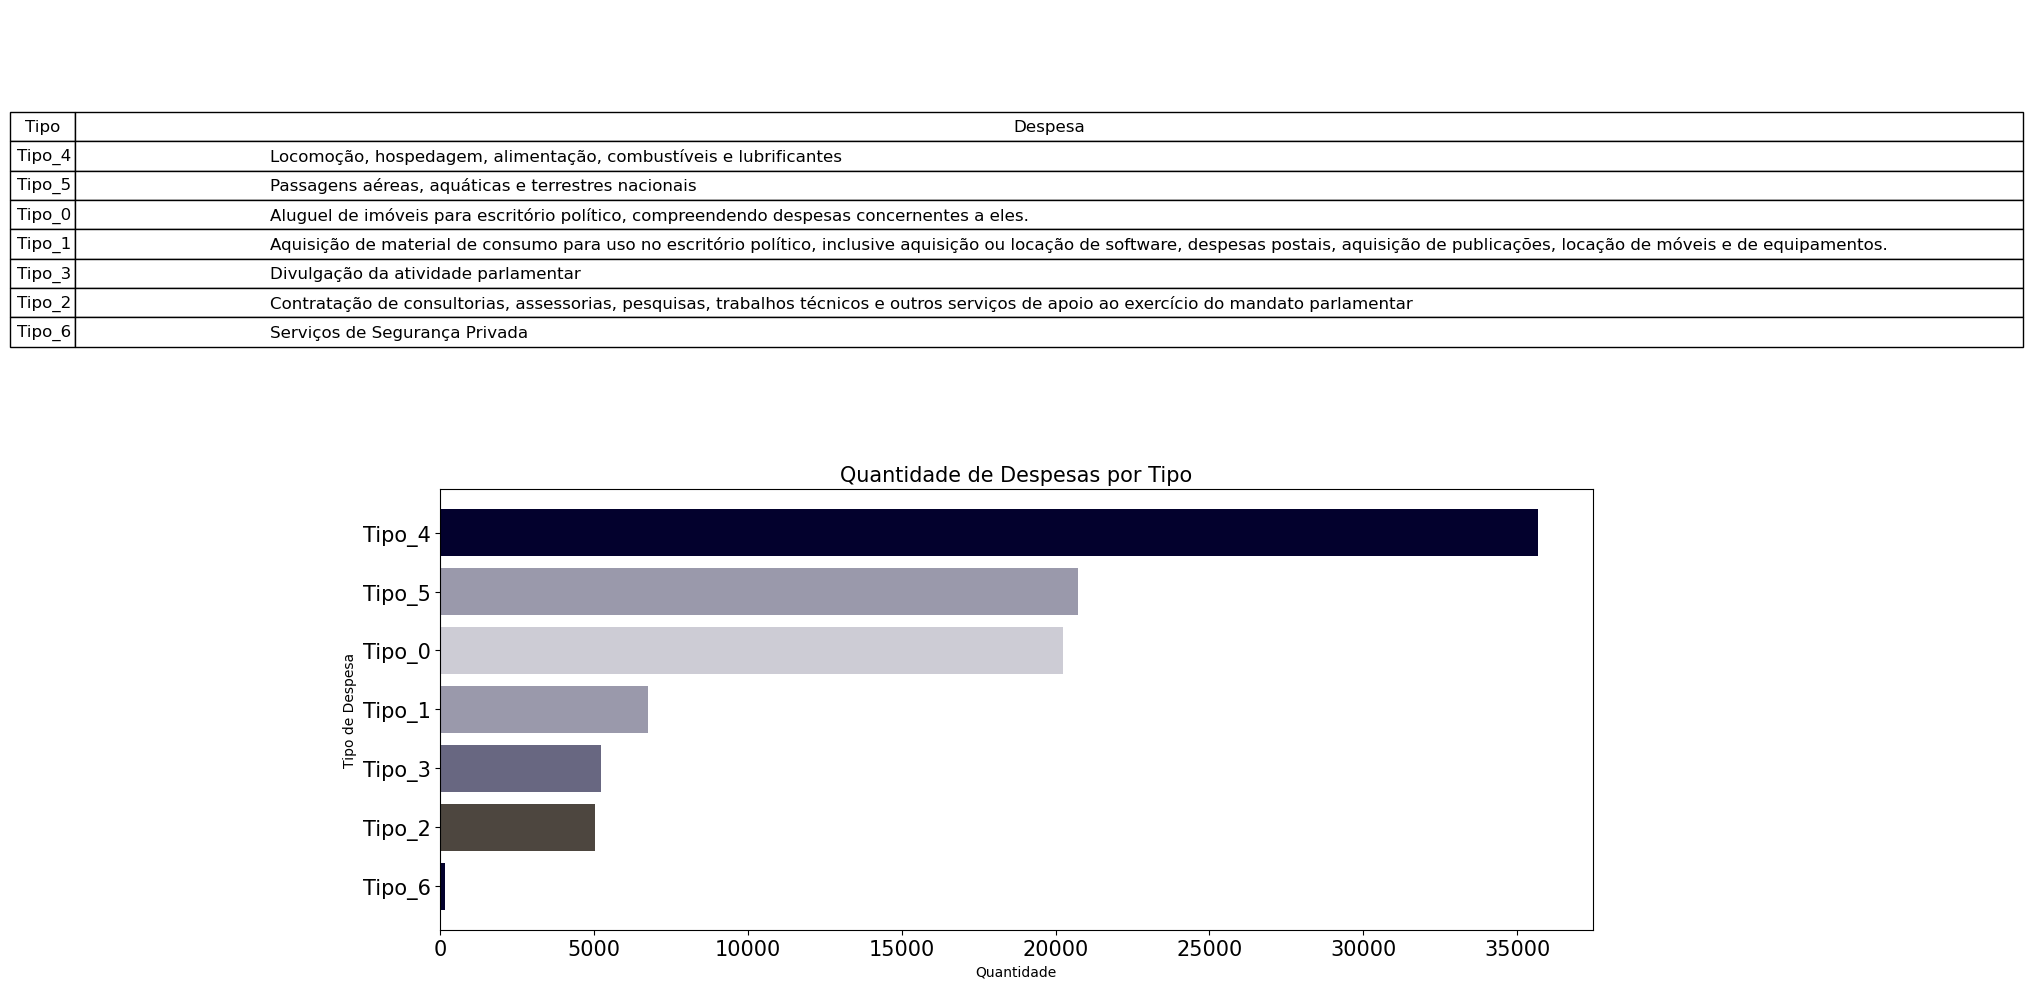

In [1126]:
# Criar gráfico de barras 

fig, ax = plt.subplots(2, 1, figsize=(18,10))
ax[0].axis('off')  # Remover eixo para mostrar apenas a tabela

# Tabela de rótulos


tabela = ax[0].table(cellText=dict_rotulo, colLabels=['Tipo', 'Despesa'], loc='center', cellLoc='left')
tabela.auto_set_font_size(False)
tabela.set_fontsize(12)
tabela.scale(1.2, 1.4)
tabela.auto_set_column_width([0, 1])  # Ajustar largura das colunas

# Cores das barras
cores = ['#03012d', '#4d463f', '#686781', '#9a99ab','#cdccd5','#9a99ab']

bars = plt.barh(rotulo, df_recorrente['QUANTIDADE'], color=cores)
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Despesa')
plt.title('Quantidade de Despesas por Tipo', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


plt.tight_layout()
plt.show()


---
## <font color=#40634D style="font-size: 25px;">Legal notar que os tipos de gastos mais frequentes espelham bastante o da analise anterior. Tendo locomoção, hospedagem, passagens áreas como mais presente no banco de dados</font>

---

4.<font color=#40634D style="font-size: 25px;"> Em ano de eleições os senadores gastam mais? </font>
---

df_ano_letivo[df_ano_letivo['SENADOR'].str.contains('IZALCI')]

In [1127]:
lista_senadores_eleitos_2018 = ['SÉRGIO PETECÃO',
 'EDUARDO BRAGA',
 'JADER BARBALHO',
 'CIRO NOGUEIRA',
 'RANDOLFE RODRIGUES',
 'RENAN CALHEIROS',
 'PAULO PAIM',
 'HUMBERTO COSTA']


In [1128]:
# Média dos gastos dos senadores nos anos eletivos (2018)

df_ano_eletivo = df.query("ANO == 2018").groupby("SENADOR")['VALOR_REEMBOLSADO'].sum().to_frame().reset_index().sort_values(by='VALOR_REEMBOLSADO', ascending=False)

# Filtrar os senadores eleitos em 2018
senadores_eleitos_2018 = df_ano_eletivo[df_ano_eletivo['SENADOR'].apply(lambda x: any(nome in x for nome in lista_senadores_eleitos_2018))]

# Tratando o dataframe dos senadores eleitos

senadores_eleitos_2018 = senadores_eleitos_2018.reset_index().drop('index', axis=1)
senadores_eleitos_2018

,SENADOR,VALOR_REEMBOLSADO
0,EDUARDO BRAGA,529599.18
1,CIRO NOGUEIRA,455942.09
2,HUMBERTO COSTA,427887.25
3,PAULO PAIM,415787.11
4,RANDOLFE RODRIGUES,373214.08
5,SÉRGIO PETECÃO,366293.49
6,RENAN CALHEIROS,169975.04
7,JADER BARBALHO,44323.47


In [1129]:
# O quanto esses senadores gastaram nos anos seguintes em média

gastos_senadores_eleitos_2018_anos_seguintes = df[df['SENADOR'].isin(senadores_eleitos_2018['SENADOR'])]
gastos_senadores_eleitos_2018_anos_seguintes = gastos_senadores_eleitos_2018_anos_seguintes.query("ANO > 2018").groupby("SENADOR")['VALOR_REEMBOLSADO'].sum().to_frame().reset_index().sort_values(by='VALOR_REEMBOLSADO', ascending=False)
gastos_senadores_eleitos_2018_anos_seguintes = gastos_senadores_eleitos_2018_anos_seguintes.reset_index().drop('index', axis=1)
gastos_senadores_eleitos_2018_anos_seguintes['VALOR_REEMBOLSADO'] = gastos_senadores_eleitos_2018_anos_seguintes['VALOR_REEMBOLSADO']/4
gastos_senadores_eleitos_2018_anos_seguintes

,SENADOR,VALOR_REEMBOLSADO
0,EDUARDO BRAGA,420881.4200
1,SÉRGIO PETECÃO,393662.0600
2,HUMBERTO COSTA,375582.4475
3,RANDOLFE RODRIGUES,356725.0375
4,JADER BARBALHO,314536.7425
5,CIRO NOGUEIRA,285258.0800
6,PAULO PAIM,269629.9625
7,RENAN CALHEIROS,261403.8550


In [1130]:
# unificando 

senadores_gastos = senadores_eleitos_2018.merge(gastos_senadores_eleitos_2018_anos_seguintes, on="SENADOR", how="right" )
senadores_gastos.columns = ['SENADOR', 'VALOR_REEMBOLSADO_2018', 'VALOR_REEMBOLSADO_SEGUINTES']

senadores_gastos

,SENADOR,VALOR_REEMBOLSADO_2018,VALOR_REEMBOLSADO_SEGUINTES
0,EDUARDO BRAGA,529599.18,420881.4200
1,SÉRGIO PETECÃO,366293.49,393662.0600
2,HUMBERTO COSTA,427887.25,375582.4475
3,RANDOLFE RODRIGUES,373214.08,356725.0375
4,JADER BARBALHO,44323.47,314536.7425
5,CIRO NOGUEIRA,455942.09,285258.0800
6,PAULO PAIM,415787.11,269629.9625
7,RENAN CALHEIROS,169975.04,261403.8550


---
## <font color=#40634D style="font-size: 25px;">Gráfico gastos senadores eleição x Anos seguintes</font>

---

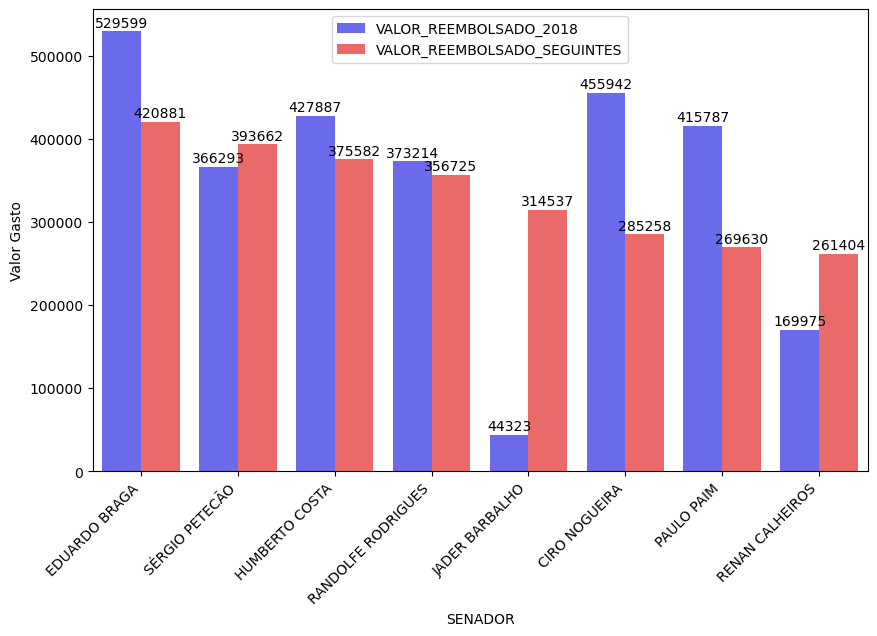

In [1131]:
# Transformar os dados no formato "longo"
df_long = pd.melt(senadores_gastos, id_vars='SENADOR', var_name='Senadores', value_name='Valor Gasto')
df_long

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_long, x='SENADOR', y='Valor Gasto', hue='Senadores', palette='seismic')
plt.xticks(rotation=45, ha='right')

plt.legend(loc='upper center')
# Adicionar os valores nas barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')

<hr style="border: 2px solid #40634D;">

## <font color=#40634D style="font-size: 25px;">Os senadores presentes nesse gráfico estavam presentes no Senado Federal durante as eleições de 2018, e venceram (podendo nós assim comparar seus gastos com os anos seguintes)</font>

## <font color=#40634D style="font-size: 25px;">Podemos observar que alguns senadores gastara m muito mais no ano de eleição do que nos demais (Eduardo Braga, Ciro Nogueira, Paulo Paim, etc)</font>

## <font color=#40634D style="font-size: 25px;">o Caso do senador Jader Barbalho é muito descrepante, pois seus gastos foram majoritariamente aopos as eleições de 2018</font>
<hr style="border: 2px solid #40634D;">

4.<font color=#40634D style="font-size: 25px;">Em qual mês os senadores gastam mais?</font>
---

In [1132]:
#tabela com os gastos em média por més

df_mes = df.groupby('MES')['VALOR_REEMBOLSADO'].mean().to_frame().reset_index()
df_mes['VALOR_REEMBOLSADO'] = df_mes['VALOR_REEMBOLSADO']
df_mes

,MES,VALOR_REEMBOLSADO
0,1,1328.930806
1,2,1233.779760
2,3,1228.244889
3,4,1234.961349
4,5,1203.241042
5,6,1229.757625
6,7,1202.366059
7,8,1237.733558
8,9,1265.559967
9,10,1338.006309


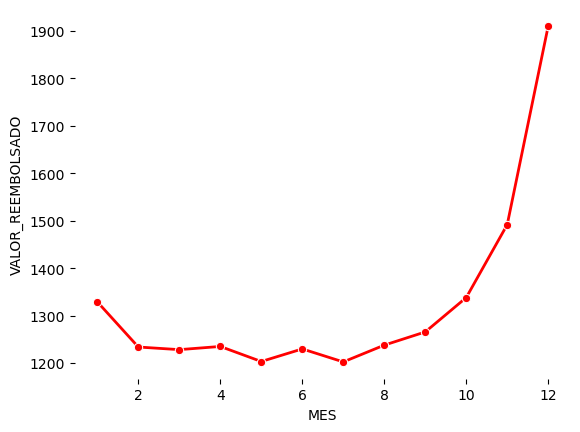

In [1133]:
# gráfico de linhas referente ao gasto por mês

# Plotagem da linha
sns.lineplot(
    data=df_mes,
    x="MES", y="VALOR_REEMBOLSADO",
    linewidth=2,  # Aumenta a espessura da linha
    marker='o',   # Adiciona marcadores redondos
    color='red'
)


sns.despine(left=True, right=True, top=True, bottom=True)



<hr style="border: 2px solid #40634D;">

## <font color=#40634D style="font-size: 25px;">O crescimento exponencial da média de gastos nos últimos meses do ano precisa ser averiguado. Quais os motivos? Há mais viagens de visita a Estados?  </font>

<hr style="border: 2px solid #40634D;">

# <font color="#FFA17A" style="font-size: 30px;">3. Forecasting</font>
<hr style="border: 2px solid #FFA17A;">

<hr style="border: 2px solid #40634D;">

## <font color=#40634D style="font-size: 25px;">Modelo de Séries Temporais - ARIMA</font>

<hr style="border: 2px solid #40634D;">

C:\Users\Migue\AppData\Local\Temp\ipykernel_7792\30541246.py:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



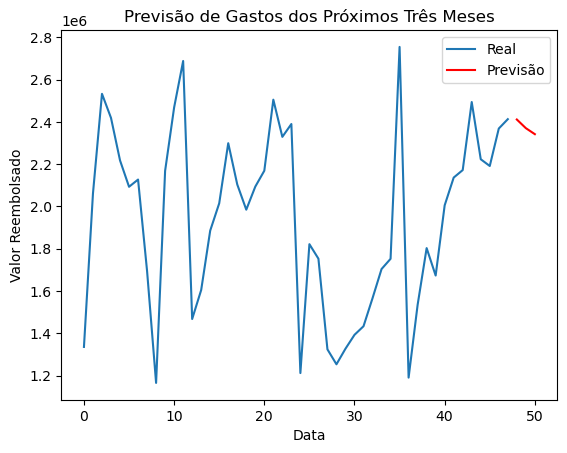

In [1146]:
# Agrupamento dos dados

df_agrupado = pd.read_csv(os.path.join("Datasets", "dataset_ceaps_forecasting.csv"))

# Renomear Colunas
df_agrupado.columns = ['DATA', 'VALOR_GASTO']

df_agrupado['DATA'] = pd.to_datetime(df_agrupado['DATA'], format='%Y/%m/%d')

df_agrupado = df_agrupado.groupby([df_agrupado['DATA'].dt.year, df_agrupado['DATA'].dt.month]).sum()

# Definir o índice
df_agrupado.index = range(len(df_agrupado))

# Treinar o modelo ARIMA
model = ARIMA(df_agrupado['VALOR_GASTO'], order=(5, 1, 0))
model_fit = model.fit()

# Prever os próximos três meses
forecast = model_fit.forecast(steps=3)

# Plotar os resultados
plt.plot(df_agrupado.index, df_agrupado['VALOR_GASTO'], label='Real')
plt.plot(forecast.index, forecast, label='Previsão', color='red')
plt.xlabel('Data')
plt.ylabel('Valor Reembolsado')
plt.title('Previsão de Gastos dos Próximos Três Meses')
plt.legend()
plt.show()

<hr style="border: 2px solid #40634D;">

## <font color=#40634D style="font-size: 25px;">De acordo com o modelo que utilizamos a tendência paras os meses futuros é um declínio nos gastos, seguindo uma tendência de descida após alcançar um pico de crescimento</font>

<hr style="border: 2px solid #40634D;">

In [1183]:
forecast.index = df_agrupado['VALOR_GASTO'].tail(3).index

# Calcular os resíduos (erros) entre os valores reais e as previsões
residuos = df_agrupado['VALOR_GASTO'].tail(3) - forecast

# Calcular o RMSE considerando apenas os últimos 3 meses
rmse = np.sqrt(mean_squared_error(df_agrupado['VALOR_GASTO'].tail(3), forecast))

# Calcular o MAPE
mape = (np.abs(residuos) / df_agrupado['VALOR_GASTO'].tail(3)).mean() * 100

#display((np.abs(residuos) / df_agrupado['VALOR_GASTO'].tail(3)).mean() * 100)
print("RMSE:", round(rmse,0))
print("MAPE:", round(mape,0))


RMSE: 133351.0
MAPE: 4.0
